# Resolviendo una PDE: Ecuación de Convección Difusión

La Ecuación de Convección Difusión describe el comportamiento del calor mediante la difusión, en donde fluye de un lugar de menor concentración a uno de mayor, y la convección, donde existe un transporte de calor a través del material.

$$u_t = Du_{xx} + cu_x$$

Similar a la ecuación de calor, ahora agregamos un término de *advección* (conocido vulgarmente también como convección) $u_x$ ponderada por un coeficiente $c$.

In [2]:
import numpy as np
from scipy.integrate import fixed_quad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

In [213]:
def convection_diffusion(xl, xr, yb, yt, M, N, D, c):
    """
        Convection Diffusion equation solver. This kind of problem combines
        the diffusion equation, where the heat just goes from the warmer zone
        to the most cold zone, with a advection equation where the heat moves
        uniformly around the domain.
        Args:
            [xl, xr]:    Space interval
            [yb, yt]:    Time interval
            M, N:        Space and time steps
            D:           Diffusion coefficient
            c:           Advection coefficient
    """
    # Boundary conditions for all t
    l = lambda t: 0*t
    r = lambda t: 0*t
    # Initial condition
    f = lambda x: np.cos(2*np.pi*x)
    # Step sizes and sigma constant
    h, k = (xr-xl)/M, (yt-yb)/N
    m, n = M-1, N
    sigma = D*k/(h**2)
    tau = c*k/(2*h)
    print("h (dx)=%f" % h)
    print("k (dt)=%f" % k)
    print("Sigma=%f, Tau=%f" % (sigma, tau))
    # Finite differences matrix
    A = np.diag((1+2*sigma)*np.ones(m)) + \
        np.diag((-sigma+tau)*np.ones(m-1),-1) + \
        np.diag((-sigma-tau)*np.ones(m-1),1)
    # Uncomment for periodic boundary conditions
    A[0][-1] = A[1][0]
    A[-1][0] = A[0][1]
    # Left boundary condition u(xl,t) from time yb
    lside = -(sigma-tau)*l(yb+np.arange(0,n+1)*k)
    # Right boundary condition u(xr,t) from time yt
    rside = -(sigma+tau)*r(yb+np.arange(0,n+1)*k)
    # Initial conditions
    W = np.zeros((m, n+1))
    W[:,0] = f(xl + np.arange(1,m+1)*h)
    for j in range(0,n-1):
        s_j = np.concatenate(([lside[j]], np.zeros(m-2), [rside[j]]))
        W[:,j+1] = np.linalg.solve(A, W[:,j] + s_j)
    print("System solved.")
    return np.vstack([lside, W, rside]).T

h (dx)=0.050000
k (dt)=0.050000
Sigma=0.002000, Tau=0.500000
System solved.


<IPython.core.display.Javascript object>


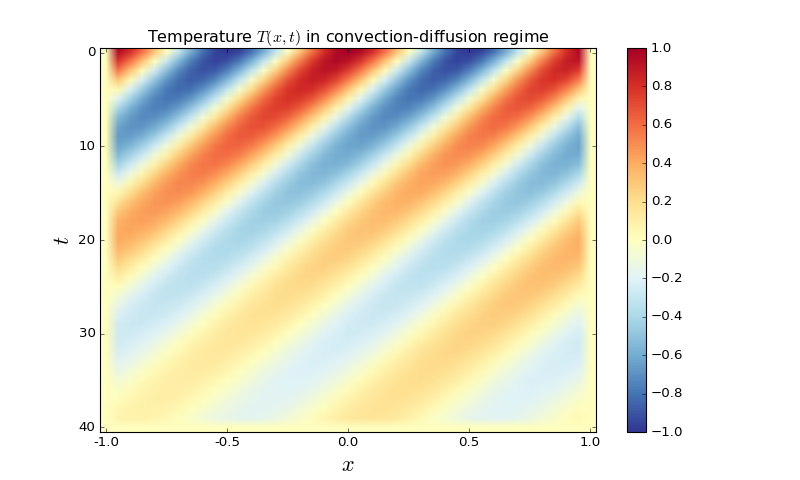

In [216]:
(xl, xr, yb, yt, M, N, D, c) = (-1, 1, 0, 2, 40, 40, 1e-4, 1)
W = convection_diffusion(xl, xr, yb, yt, M, N, D, c)

# Plot results
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
matrix = ax.imshow(W, aspect='auto',cmap=cm.RdYlBu_r)
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$t$", fontsize=20)
ax.set_xticks(np.linspace(0,M,5))
ax.set_xticklabels(np.linspace(xl,xr,5))
ax.set_title("Temperature $T(x,t)$ in convection-diffusion regime")
fig.colorbar(matrix)
plt.draw()

<IPython.core.display.Javascript object>


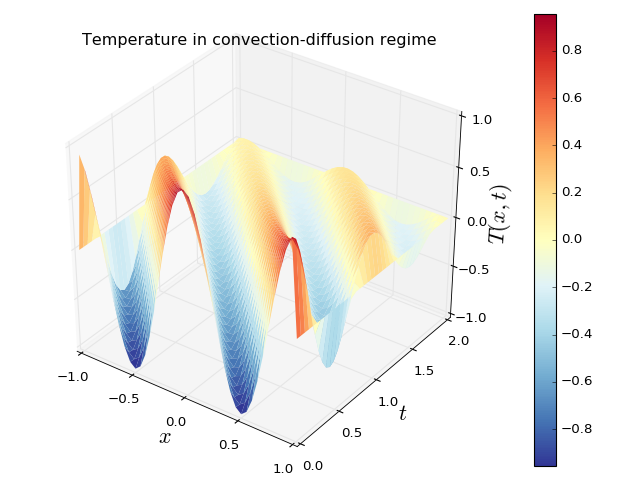

In [217]:
[X, T] = np.meshgrid(np.linspace(xl, xr, M+1), np.linspace(yb, yt, N+1))
# Plot results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$t$", fontsize=20)
ax.set_zlabel("$T(x,t)$", fontsize=20)
ax.set_title("Temperature in convection-diffusion regime")
surface = ax.plot_surface(X, T, W, cmap=cm.RdYlBu_r, linewidth=0, antialiased=True, rstride=1, cstride=1)
fig.colorbar(surface)
plt.tight_layout()
plt.draw()

## Disclaimer

El presente notebook ha sido creado para el curso ILI286 - Computación Científica 2, del Departamento de Informática, Universidad Técnica Federico Santa María. El material ha sido creado por Alejandro Sazo (asazo@alumnos.inf.utfsm.cl). En caso de encontrar un error, por favor no dude en contactar al email especificado. Puede encontrar la última versión del código en https://github.com/asazo/CC2